## Домашнее задание 1
Копчев Владислав, БПМИ197

Анализ данных в бизнесе

Перед тем, как приступить к работе, необходимо импортировать все необходимые зависимости.

In [58]:
#!pip install kneed

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

### Часть 1

Начну исследовать распределения по данным. Для начала рассчитаю количество и долю уникальных, нулевых и пустых значений. Загружу данные.

In [30]:
df = pd.read_csv('HW1_var_5.csv', sep=';')

In [31]:
df.sample(3)

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
1584,5,1031685,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1,0.49,мужской,0,0,среднее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9847,5,1196945,Форма банка (без печати работодателя),Ремонт,0,0.47,женский,1,0,Высшее/Второе высшее/Ученая степень,...,0.0,7.0,96.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
196,5,1003925,Форма банка (без печати работодателя),Покупка бытовой техники,1,0.33,мужской,0,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для начала для удобства удалю колонку "Номер варианта" — она бесполезна.

In [32]:
df.drop('Номер варианта', axis=1, inplace=True)

Теперь перейду к рассчету количеств и доль указанных выше значений. Для этого воспользую встроенными в библиотеку `pandas` методами `unique()` и `isnull()`, а также возможностью делать срезы данных по выражению с булевым значением. Запишу их все в отдельную табличку `DataFrame`.

In [33]:
null_zero_unique = pd.DataFrame()
data_for_df = dict()

In [34]:
for col in df:
    data_for_df[col] = [pd.unique(df[col]).size, pd.unique(df[col]).size / df[col].size,
                        df[df[col] == 0].shape[0], df[df[col] == 0].shape[0] / df[col].size,
                        df[df[col].isnull()].size, df[df[col].isnull()].shape[0] / df[col].size]

In [35]:
null_zero_unique = pd.DataFrame(data_for_df, index=["Количество уникальных значений в колонке",
                                                    "Доля уникальных значений",
                                                    "Количество нулевых значений",
                                                    "Доля нулевых значений",
                                                    "Количество пропущенных значений",
                                                    "Доля пропущенных значений"])
null_zero_unique

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
Количество уникальных значений в колонке,10243.0,5.000000,10.000000,2.000000,62.000000,2.000000,7.000000,3.000000,9.000000,10.000000,...,9.000000,102.000000,132.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
Доля уникальных значений,1.0,0.000488,0.000976,0.000195,0.006053,0.000195,0.000683,0.000293,0.000879,0.000976,...,0.000879,0.009958,0.012887,0.000293,0.000293,0.000293,0.000293,0.000293,0.000293,0.000293
Количество нулевых значений,0.0,0.000000,0.000000,4104.000000,1.000000,0.000000,6154.000000,10214.000000,0.000000,0.000000,...,2115.000000,113.000000,8.000000,1606.000000,3132.000000,3354.000000,3431.000000,3566.000000,3623.000000,3628.000000
Доля нулевых значений,0.0,0.000000,0.000000,0.400664,0.000098,0.000000,0.600801,0.997169,0.000000,0.000000,...,0.206482,0.011032,0.000781,0.156790,0.305770,0.327443,0.334960,0.348140,0.353705,0.354193
Количество пропущенных значений,0.0,2451.000000,0.000000,0.000000,5246.000000,0.000000,0.000000,0.000000,0.000000,387.000000,...,282381.000000,282381.000000,282381.000000,282381.000000,282381.000000,282381.000000,282381.000000,282381.000000,282381.000000,282381.000000
Доля пропущенных значений,0.0,0.005565,0.000000,0.000000,0.011911,0.000000,0.000000,0.000000,0.000000,0.000879,...,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121


Теперь рассчитаю различные показатели разброса. Для этого воспользуюсь встроенными в `pandas` методами `mean()`, `median()` и т. д. Точно так же запишу это все в отдельную табличку. Замечу, что исследовать распределение числовых и категориальных признаков надо по-разному, поэтому для начала составлю таблицу тех и других. Очевидно, что все признаки, имеющие `dtype` `object`, точно категориальные. А `float64`-признаки, не являющиеся числовыми, отберу вручную: для этого создам список `float64_cat` с такими признаками. Также заведу список с признаками, подлежащими удалению, — они не несут информации о закономерностях в данных и только помешают при построении модели. Таким признаком является `ID`. Переменные-флаги точно категориальные. Переменные, которые выражают количество, лучше считать числовыми: при кластеризации клстеры поделятся в том числе по тому, в каком интервале лежат значения этого признака: к примеру, слишком мало, слишком много и среднее количество.

In [36]:
categorial = []
numeric = []
float64_cat = ['INSURANCE_FLAG', 'BANKACCOUNT_FLAG', 'if_zalog', 'dlq_exist', 
                'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 
                'thirty_vintage', 'sixty_vintage', 'ninety_vintage']
to_del = ['ID']

for col in df.drop(to_del, axis=1):
    if df[col].dtype == 'object' or col in float64_cat:
        categorial.append(col)
    else:
        numeric.append(col)

print(len(categorial) + len(numeric) + len(to_del) == df.shape[1])  # все ли имеющиеся признаки были распределены по спискам?

True


Теперь перейду к собственно расчету показателей разброса. Для этого воспользуюсь встроенными в `pandas` методами `mean()`, `median()` и т. д. Точно так же запишу это все в отдельную табличку. 

In [37]:
disp_measures_num = pd.DataFrame()
data_for_df = dict()

In [38]:
for col in numeric:
    cur_col = df[col]
    if cur_col.dtype != "object":
        data_for_df[col] = [cur_col.mean(), cur_col.median(), cur_col.std(), 
                        cur_col.min(), cur_col.max(), "numeric"]

In [39]:
disp_measures_num = pd.DataFrame(data_for_df, index=["Среднее", "Медиана", 
                                                "Стандартное отклонение",
                                                "Минимум", "Максимум",
                                                "Тип данных"])
disp_measures_num

,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,...,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan
Среднее,0.385248,0.55433,0.00371,66.374479,36.324751,1.58582,1.14078,0.850548,0.635297,0.523591,...,0.094124,0.423867,2.21654,3.560664,83.880033,5.777748,1.081066,0.710555,14.190968,61.1284
Медиана,0.4,0.0,0.0,45.0,35.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.4,2.0,3.0,64.0,5.0,1.0,0.0,10.0,66.0
Стандартное отклонение,0.135915,0.785071,0.073851,67.465261,8.612645,1.878678,1.593697,1.328305,1.158869,1.036584,...,0.342632,0.288988,1.682049,3.232971,72.421375,4.111024,1.052867,1.049267,15.302198,30.323424
Минимум,0.0,0,0,6.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0
Максимум,0.6,14,2,966.0,62.0,18.0,18.0,15.0,15.0,15.0,...,4.0,1.0,13.0,25.0,460.0,27.0,7.0,7.0,107.0,171.0
Тип данных,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,...,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


Теперь исследую распределение категориальных данных. Для этого рассмотрю, какие бывают значения, насколько симметрично они распределены (то есть, насколько вероятности разных значений примерно одинаково распределены). Выведу разницу между минимальной и максимальной вероятностью не-`NaN` значений, количество не-`NaN` значений, вероятность `NaN` среди значений. Точно так же запишу все в табличку.

In [40]:
disp_measures_cat = pd.DataFrame()
data_for_df = dict()

In [41]:
for col in categorial:
    nan_probability = 1.
    val_probabilities = []
    vals = set(df.loc[~df[col].isnull(), col].values)
    for val in vals:
        val_probability = df.loc[df[col] == val, col].size / df[col].shape[0]
        val_probabilities.append(val_probability)
        nan_probability -= val_probability
    diff = np.max(val_probabilities) - np.min(val_probabilities)
    data_for_df[col] = [nan_probability, diff, len(vals), "categorial"]

In [42]:
disp_measures_cat = pd.DataFrame(data_for_df, index=["Вероятность NaN", 
                                                    "Разница между максимальной и мнимальной вероятностью",
                                                    "Количество значений", "Тип данных"])
disp_measures_cat

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,SEX,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,if_zalog,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
Вероятность NaN,0.005565,-0.0,0.0,0.0,-0.0,0.000879,0.012008,0.226496,0.226496,0.610466,0.610466,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121,0.641121
Разница между максимальной и мнимальной вероятностью,0.239871,0.538612,0.198672,0.103583,0.56751,0.369325,0.62306,0.602167,0.21234,0.257737,0.210388,0.121839,0.045299,0.25266,0.296007,0.311042,0.337401,0.348531,0.349507
Количество значений,4,10,2,2,9,9,8,4,12,6,6,2,2,2,2,2,2,2,2
Тип данных,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial,categorial


Мы видим большую разницу между минимальной и максимальной вероятностью в `EMPL_TYPE`, `EMPL_SIZE`, `BANKACCOUNT_FLAG`, `thirty_in_a_year`, `sixty_in_a_year`, `ninety_in_a_year`, `thirty_vintage`, `sixty_vintage`, `ninety_vintage`. Большую вероятность `NaN` во всех столбцах подряд с `EMPL_FORM` до `ninety_vintage`.

Уже на данном этапе была проделана некоторая работа. Какие можно сделать выводы из полученных результатов?

1. В первой таблице мы видим, что в ID нет пропусков и повторов — данные соответствуют реляционной модели. Далее мы видим, что уникальных значений в колонках, сообщающих важную информацию, довольно мало. К примеру, причин брать кредит всего 10! До колонки `EMPL_TYPE` пропущенных значений нет, в этой же колонке их резко становится много. Вероятно, часть людей просто забыли принести документы о подтверждении зарплаты или не оформили их. В колонке `EMPL_SIZE` также много пропусков, притом нулевых значений нет. Примерно столько же пропусков в `DTI`, но на пару десятков меньше. Вероятно, у части людей вообще нет постоянной работы, поэтому доходы есть, а зарплаты нет. В `BANKACCOUNT_FLAG` и `EMPL_PROPERTY` одинаковое число пропусков. Видимо, в какой-то момент произошел сбой и оператору невозможно было получить доступ к информации об онлайн-аккаунтах, в которых также была записана информация о сфере бизнеса работодателя. Аналогично, одинаковое число пропусков в колонках `EMPL_FORM` и `FAMILY_STATUS`; во всех с `if_zalog` до `ninety_vintage`; `age` и `max90days`; с `max60days` до `max14days`; с `num_AccountActive180` до `max_MnthAfterLoan`. Возможно, опять же, для каждого такого набора столбцов доступ к информации находился в каких-то конкретных блоках информационной системы, к которым нельзя было получить доступ в данный момент, поэтому так появились пропуски. Доля и количество одинаковых значений везде примерно одинаково маленькое, кроме `avg_num_delay` — это единственный столбец с долей > 0.1. По всей видимости, все люди задерживают оплату по-разному! Доля нулевых значений огромна в `DEPENDANT_NUMBER`. Видимо, у кого есть иждивенцы, тому кредит не выдают практически всегда. Отсутствие нулевых знаечний в столбцах типа `Period_at_work` и `age` говорит о том, что данные заполнены правильно. Также можно заметить, что во многих столбцах много пропусков (больше половины) — полнота данных низкая. 

2. Рассмотрим числовые признаки. `DTI` не может быть равен нулю — это явно какая-то ошибка, учитывая то, что `EMPL_SIZE` нигде не равен нулю. Однако минимальное знаечние здесь именно таково. Строки с нулевыми значениями `DTI` надо удалить. Ровно как и строки с `min_MnthAfterLoan`, равным -1. На основании анализа минимальных и максимальных значений остальные данные кажутся корректными. При этом мы можем заметить, что кредиыт берут и молодые, и пожилые — эта информация тоже пригодится при сегментации. Ровно как и люди с самым разным временем работы. Опять же, люди с очень маленьким или очень большим временем работы также очень интересны для изучения. Посмотрим на характеристики разброса (первые 3 строчки). Мы можем составить портрет типичного человека, берущего кредит, на основании средних значений — это поможет при интерпретации результатов кластеризации. Такому человеку 36 лет, он работает больше 2 месяцев (вероятно, часто меняет работу, учитывая возраст?), запросов в БКИ очень мало, судя по среднему значению `all_credits`, ранвому почти 6, кредит берет не один раз (во взрослом возрасте часто меняет работу и часто берет кредит – нет устойчивого и стабильного источника дохода?). Посмотрим на медиану. Получаем, что чаще всего у такого человека нет детей (среднее `FULL_AGE_CHILD_NUMBER`, равное приблизительно 0.5, нам ни о чем не говорит — есть дети или нет? Так что нужна была медиана), работает полтора месяца на работе, обращений в БКИ не было за последние 30 дней, но былт за более долгие промежутки времени — кредиты, кажется, берет часто, но не очень часто. Теперь посмотрим на стандартное отклонение, чтобы узнать, насколько часто встречаются люди, сильно отклоняющиеся от среднего. Серьезное откллнение наблюдается в столбцах `Period_at_work`, `age`, `sum_of_paym_months` — значит, именно эти признаки будут сильнее всего влиять на различия между этими кластерами.

3. Рассмотрим категориальные признаки. Разница между максимальной и минимальной вероятностью огромна в столбцах `CREDIT_PURPOSE`, `EDUCATION`, `EMPL_TYPE`, `EMPL_SIZE`, `BANKACCOUNT_FLAG`. То есть, такие признаки как пол, способ подтверждения дохода у всех разные, а вот что действительно наиболее характерно для обычного человека, берущего кредит, — наибольшее количество таких людей имеют одну причину для кредита, одно образование (скорее всего, его нет), один уровень зарплаты, то есть, происходят из одного социального слоя (поскольку такие признаки, как образование и уровень дохода, определяют именно страту). 

Не будем останвливаться на этом. Пойдем дальше в нашем исследовании данных. Но для начала удалим обнаруженные некорректные данные:

In [43]:
df.drop(df[df['DTI'] == 0].index, axis=0, inplace=True)
df.drop(df[df['min_MnthAfterLoan'] < 0].index, axis=0, inplace=True)

Теперь необходимо выделить основные признаки в наших данных. Ранее мы выясниои, что такие признаки как `SEX`, `INCOME_BASE_TYPE`, `FAMILY_STATUS` распределены примерно одинаково, а вот самые важные признаки — `CREDIT_PURPOSE`, `FULL_AGE_CHILD_NUMBER`, `EDUCATION`, `EMPL_TYPE`, `EMPL_SIZE`, `Period_at_work`, `age`. Теперь посмотрим на них в парах! По всему датасету первые распределены равномерно, вторые — нет. А во взаимодействии? Для этого посмотрю на корреляции этих признаков. Выберу из них самые главные, проинтерпретирую результаты, посмотрю графики, характеризующие распределение самых главных признаков.

Для числовых признаков построю матрицу корреляции в SAS Viya. Получился следующий рехультат:


<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Correlation%20of%20Selected%20Measures%2003-06-2022%20at%209.13.26%20PM.png" alt="pic" />

Видно, что есть сильная корреляция между `sum_of_paym_months` и `all_credits` — количество кредитов коррелирует с суммой выплат за месяц, что неудивительно и не раскрывает нам какие-то новые закономерности. Точно так же корреляция `all_credits` с `avg_num_delay` и `dlq_exists` неудивительна — большое количество кредитов, очевидно, сопутствует просрочкам. Также мы можем заметить, что просрочки связаны с наличием детей (объясняется расходами на детей), а наличие залога коррелирует с величиной выплат за месяц. В общем, ничего удивительного не обнаружено. Новые важные признаки не найдены. Посмотрим, как качественные признаки влияют на количественные с помощью box plot и heatmap!

Как видно из графиков ниже, влияние пола на распределение признаков минимально, так что его анализировать не будем. Попробуем найти закономерности в распределении возраста в зависимости от образования. Мы видим, что о людях, которые не закончили даже среднее образование, информации в нашем датасете почти нет. В рапсределении по возрасту мы можем увидеть, что ящики примерно одинаковые у людей со средним образованием и у людей с выскшим — существенные различия здесь только в этом, внутри самих групп они незначительные. Различия в периоде работы и `DTI` в зависимости от образования также минимальные. Таким образом, пол не "коррелирует" (в переносном смысле) ни с чем, образование — разве что с возрастом. Причины кредита "покупка автомобиля/недвижимости/ремонт" сопутствует семейным положениям "женат/замужем" и "холост/не замужем". В первом случае, видимо, недавно образовавшиеся семьи и молодые люди, только закончившие образование, делают необходимые большие покупки — это подтверждается нижним графиком с причиной в зависимости от возраста. Остальные графики никакой очень важной информации не сообщают.


<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20age%20by%20SEX%2003-06-2022%20at%209.23.43%20PM.png" alt="pic" />


<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20age%20by%20EDUCATION%2003-06-2022%20at%209.24.35%20PM.png" alt="pic" />



<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Period_at_work%20by%20EDUCATION%2003-06-2022%20at%209.25.10%20PM.png" alt="pic" />


<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20DTI%20by%20EDUCATION%2003-06-2022%20at%209.25.39%20PM.png" alt="pic" />

Heat maps

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20by%20CREDIT_PURPOSE%2C%20FAMILY_STATUS%2003-06-2022%20at%209.26.14%20PM.png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20by%20CREDIT_PURPOSE%2C%20age%2003-06-2022%20at%209.26.26%20PM.png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20by%20EMPL_SIZE%2C%20Period_at_work%2003-06-2022%20at%209.23.22%20PM.png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20by%20EMPL_SIZE%2C%20SEX%2003-06-2022%20at%209.22.31%20PM.png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20by%20EMPL_SIZE%2C%20age%2003-06-2022%20at%209.22.48%20PM.png
" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20by%20SEX%2C%20Period_at_work%2003-06-2022%20at%209.23.36%20PM.png
" alt="pic" />










Теперь построим гистограммы. По ним можно сказать, что, по всей видимости, в данных много выбросов.



<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20of%20DTI%2003-06-2022%20at%209.27.23%20PM.png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20of%20Period_at_work%2003-06-2022%20at%209.27.38%20PM.png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/Snapshot%20of%20Frequency%20of%20age%2003-06-2022%20at%209.27.12%20PM.png" alt="pic" />





Из анализа гистограмм можно сделать вывод о том, что `DTI` тоже является одним из важных признаков, который при этом ни с чем больше не коррелирует (см. матрицу корреляции в начале), так что его тоже будем использовать как основной признак.

Итак, мы выделили самые важные в данных признаки — какие признаки сопутствуют друг другу, какие влияют на данные больше всего, это пригодится при выполнении сегментации. Также заметили, что данные не везде корректны и удалили строчки с некорректными значениями, а также обратили внимание на выбросы в данных. Осталось удалить выбросы, сделать проверку наличия некорректных знаков и исправить ошибки, восстановить пропущенные значения или исключить клиентов с чрезмерным количеством пропусков. Приступим к этой части задания.

Исключим выбросы из числовых переменных:

In [44]:
for col in numeric:
    q_low = df[col].quantile(0.01)
    q_high  = df[col].quantile(0.99)
    df_f = df[(df[col] < q_high) & (df[col] > q_low)]
df = df_f

Некорректные значения числовых признаков уже были удалены. Теперь перейдем к категориальным! Заметим, что иногда пропуски в категориальных переменных записаны как `*n.a.*`, заменим это на просто пустую строку!

In [45]:
df.loc[:, categorial] = df.loc[:, categorial].replace({'*n.a.*': ''})

Заполняем пропуски средними для числовых столбцов:

In [46]:
for col in numeric:
    df[col].replace(np.nan, df[col].mean())

Для категориальных заменю модой:

In [47]:
for col in categorial:
    df[col].replace('', df[col].mode()[0])

Итак, в этой части был произведен первичный анализ данных. Были замечены и исправлены ошибки в данных, удалены выбросы, заменены пропуски. Помимо этого, были проанализированы распределения данных, сделаны предположения о возможных кластерах, построены и проанализированы графики, характеризующие взаимосвязи между признаками. В следующей части я отберу на основе этого анализа самые важные признаки, выберу наиболее подходящую модель сегментации, построю сегментацию и проинтерпретирую результаты.

### Часть 2

Начну выполнение второй части задания с отбора наиболее важных признаков. Ими будут `CREDIT_PURPOSE`, `EDUCATION`, `EMPL_TYPE`, `EMPL_SIZE`, `age`, `DTI` как признаки, которые резко разграничивают датасет. Также добавлю сюда `FAMILY_STATUS`, который хорошо разграничивает датасет вместе с `CREDIT_PURPOSE`, а также замечу, что `age` и `education` хорошо работают вместе. В остальных данных очень много пропусков, они крайне неоднородны, так что брать их даже не стоит. Также добавлю `dlq_exists`, который показал свою важность на основе проанализированной матрицы корреляции (самый первый график). Таким образом, наш датасет будет выглядеть вот так:

In [48]:
df = df[['CREDIT_PURPOSE', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'age', 'DTI', 'FAMILY_STATUS', 'dlq_exist']]

Исправлю индексы

In [49]:
df.index = list(range(len(df.index)))

In [50]:
df

,CREDIT_PURPOSE,EDUCATION,EMPL_TYPE,EMPL_SIZE,age,DTI,FAMILY_STATUS,dlq_exist
0,Ремонт,высшее,менеджер среднего звена,>250,35.0,0.49,холост / не замужем,0.0
1,Ремонт,высшее,менеджер высшего звена,>250,47.0,0.16,женат / замужем,0.0
2,Ремонт,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,37.0,0.20,холост / не замужем,1.0
3,Покупка недвижимости/ строительство,высшее,специалист,>250,28.0,0.49,гражданский брак,1.0
4,Ремонт,среднее-специальное,специалист,< 50,51.0,0.18,разведен / разведена,0.0
...,...,...,...,...,...,...,...,...
3576,Ремонт,Высшее/Второе высшее/Ученая степень,специалист,< 50,32.0,0.31,холост / не замужем,0.0
3577,Покупка недвижимости/ строительство,высшее,вспомогательный персонал,< 50,32.0,0.44,холост / не замужем,0.0
3578,Ремонт,высшее,вспомогательный персонал,>250,48.0,0.25,женат / замужем,1.0
3579,Ремонт,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,< 50,59.0,0.31,женат / замужем,0.0


Теперь выберу модель. Ей будут точно не бизнес-правила — наши признаки выглядят так, что сегмент с одним значением имеет очень большую (но меньше 50%) вероятность, а остальные — меньше, притом признаков не так уж мало (8), в связи с чем правило должно быть достаточно сложным, так что, скорее всего, сложно будет придумать правило, которое будет хорошо отражать действительность. Квантили так же не подойдут — чтобы разбить данные на равновероятные интервалы, придется выбирать слишком большие интервалы, в которые неизбежно попадут разнородные данные — опять же, здесь нужен какой-то более сложный метод, который найдет здесь сложную закономерность. Кластеризация без учителя методом K-Means подойдет хорошо — как видно из исследования взаимосвязей признаков, box plots разных пар признаков зачастую очень похожи, а корреляционная матрица показывает, что большинство признаков вообще между собой не коррелируют. Таким образом, если выбрать достаточное количество признаков и по графикам определить, какое примерно количество сегментов в данных, этот метод должен сработать хорошо. Мне кажется, я выбрал действительно важные признаки, а на основе первой части можно сказать, что основные кластеры примерно такие: молодые люди и люди среднего возраста, совершающие большие покупки, которые разбиваются на людей с доходом поменьше, которые берут кредиты часто, и на людей, которые берут кредиты нечасто и имеют доход побольше, а также все остальные. В результате получится 3–4 кластера. Примерное число кластеров известно, хорошие признаки известны — осталось построить закономерность с помощью K-Means. Также не подойдет кластеризация с учителем. Нейросети не подойдут, поскольку плохо работают с табличными данными, регрессия не подойдет, поскольку зависимость явно сложная и нелинейная. Хорошим методом могло бы быть дерево решений — с этим методом не так все легко испортить, как с бустингом, при этом легко интерпретировать и находить нелинейные зависимости. Однако все упирается в ту же проблему, что с квантилями и бизнес-правилами — очень тяжело понять, как отнести строчки к кластерам в `train`. В результате выберу DBSCAN в качестве второго метода — он точно так же найдет сложную нелинейную зависимость, данные хорошо подходят для этого метода тем, что разброс в данных не такой уж маленький, так что можно будет найти какие-то интересные кластеры с помощью данного алгоритма.

Итак, модели выбраны. Попробую разбить данные на 3 и 4 кластера с помощью K-Means. Буду использовать `LabelEncoder`. В данном случае он подходит гораздо лучше, чем `OneHotEncoder`, поскольку в задаче кластеризации, как мне кажется, хорошо, когда данные имеют не очень большую размерность, так что кластеры легче интерпретировать и строить. Для удобства дальнейшей интерпретации выведу в виде словаря отображение, задаваемое 'LabelEncoder'ом.

In [51]:
categorial = ['CREDIT_PURPOSE', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'FAMILY_STATUS', 'dlq_exist']
le = LabelEncoder()
for col in categorial:
    df[col] = le.fit_transform(df[col])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(col, ":", le_name_mapping)
df

CREDIT_PURPOSE : {'Другое': 0, 'Лечение': 1, 'Обучение': 2, 'Отпуск': 3, 'Покупка автомобиля': 4, 'Покупка бытовой техники': 5, 'Покупка земли': 6, 'Покупка мебели': 7, 'Покупка недвижимости/ строительство': 8, 'Ремонт': 9}
EDUCATION : {'': 0, 'Высшее/Второе высшее/Ученая степень': 1, 'второе высшее': 2, 'высшее': 3, 'незаконченное высшее': 4, 'среднее': 5, 'среднее-специальное': 6, 'ученая степень': 7}
EMPL_TYPE : {'вспомогательный персонал': 0, 'другое': 1, 'менеджер высшего звена': 2, 'менеджер по продажам': 3, 'менеджер среднего звена': 4, 'рабочий': 5, 'специалист': 6, 'страховой агент': 7, 'торговый представитель': 8}
EMPL_SIZE : {'': 0, '< 50': 1, '>250': 2}
FAMILY_STATUS : {'вдовец / вдова': 0, 'гражданский брак': 1, 'женат / замужем': 2, 'повторный брак': 3, 'разведен / разведена': 4, 'холост / не замужем': 5}
dlq_exist : {0.0: 0, 1.0: 1}


<ipython-input-51-258cdd36b488>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


,CREDIT_PURPOSE,EDUCATION,EMPL_TYPE,EMPL_SIZE,age,DTI,FAMILY_STATUS,dlq_exist
0,9,3,4,2,35.0,0.49,5,0
1,9,3,2,2,47.0,0.16,2,0
2,9,1,0,2,37.0,0.20,5,1
3,8,3,6,2,28.0,0.49,1,1
4,9,6,6,1,51.0,0.18,4,0
...,...,...,...,...,...,...,...,...
3576,9,1,6,1,32.0,0.31,5,0
3577,8,3,0,1,32.0,0.44,5,0
3578,9,3,0,2,48.0,0.25,2,1
3579,9,1,2,1,59.0,0.31,2,0


Перейдем теперь к кластеризации KMeans. Ранее была сделана гипотеза о 3–4 кластерах, но все же стоит воспользоваться Elbow method.

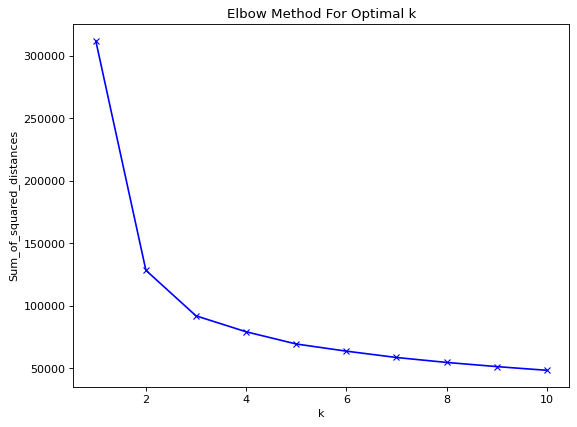

In [52]:
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Мы видим, что надо брать 3 кластера.

In [53]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(df)
df_kmeans = df
df_kmeans['labels'] = label

<ipython-input-53-2edee9ea5533>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['labels'] = label


In [54]:
df_kmeans

,CREDIT_PURPOSE,EDUCATION,EMPL_TYPE,EMPL_SIZE,age,DTI,FAMILY_STATUS,dlq_exist,labels
0,9,3,4,2,35.0,0.49,5,0,1
1,9,3,2,2,47.0,0.16,2,0,2
2,9,1,0,2,37.0,0.20,5,1,1
3,8,3,6,2,28.0,0.49,1,1,0
4,9,6,6,1,51.0,0.18,4,0,2
...,...,...,...,...,...,...,...,...,...
3576,9,1,6,1,32.0,0.31,5,0,0
3577,8,3,0,1,32.0,0.44,5,0,0
3578,9,3,0,2,48.0,0.25,2,1,2
3579,9,1,2,1,59.0,0.31,2,0,2


Теперь применим DBSCAN.

In [55]:
dbscan = DBSCAN(eps=2.5, min_samples=3)
dbscan.fit(df)
labels = dbscan.labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

Найдем оптимальное значение `eps` с помощью `kneed`.

2.65058484112469


<Figure size 360x360 with 0 Axes>

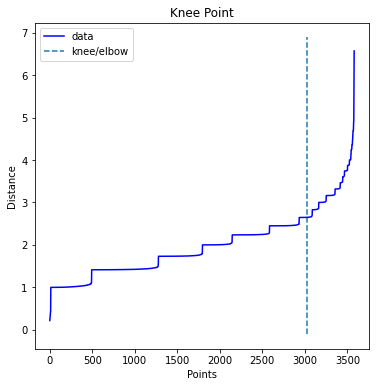

In [60]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Построим кластеризацию с новым `eps`.

In [61]:
dbscan = DBSCAN(eps=2.65058484112469, min_samples=3)
dbscan.fit(df)
df_dbscan = df.copy()
labels = dbscan.labels_
df_dbscan['labels'] = labels
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

In [62]:
df_dbscan

,CREDIT_PURPOSE,EDUCATION,EMPL_TYPE,EMPL_SIZE,age,DTI,FAMILY_STATUS,dlq_exist,labels
0,9,3,4,2,35.0,0.49,5,0,0
1,9,3,2,2,47.0,0.16,2,0,0
2,9,1,0,2,37.0,0.20,5,1,0
3,8,3,6,2,28.0,0.49,1,1,0
4,9,6,6,1,51.0,0.18,4,0,0
...,...,...,...,...,...,...,...,...,...
3576,9,1,6,1,32.0,0.31,5,0,0
3577,8,3,0,1,32.0,0.44,5,0,0
3578,9,3,0,2,48.0,0.25,2,1,0
3579,9,1,2,1,59.0,0.31,2,0,0


Получилось 6 кластеров.

### Выводы

Итак, на данном этапе были применены алгоритмы кластеризации DBSCAN и KMeans для решения задачи сегментации. Проанализирую результаты. Для этого выгружу их в формате `csv` и построю дашборды в SAS Viya.

In [ ]:
df_kmeans.to_csv('kmeans.csv')
df_dbscan.to_csv('dbscan.csv')

Построим дашборды для KMeans по всем 8 признакам.
Итак, мы видим, что существуют три кластера, в первую очередь разбивающие датасет на три непересекающиеся группы по возрасту: молодые, зрелые, пожилые. Среди молодых нет людей, зарабатывающих мало, и много людей, зарабатывающих много. Среди пожилых все зарабатывают либо средне, либо много (примерно поровну). Зрелые зарабатывают мало, средне и много также примерно поровну. Если посмотртеь на `FAMILY_STATUS`, вспомнив отображение, которое было выведено выше, можем заметить, что распределение тут примерно одинаковое в трех кластерах, за исключением того, что среди молодых больше холостых/незамужних (во втором и третьем их заметно меньше) — вероятно, еще просто не успели в силу возраста осуществить бракосочетание. Среди первого кластера особенно много людей со вторым высшим, остальные типы образования распределены между кластерами примерно поровну (только в первом кластере нет людей с ученой степенью — в силу возраста). В `DTI` значимых различий также не наблюдается. Среди первого кластера больше всего рабочих и нет страховых агентов, среди третьего нет страховых агентов и "других". Среди первого чаще всего уже существует просрочка. Среди первого чаще, чем в других, берут для покупки бытовой техники. Также рабочих в первом кластере больше, чем в других.

Итак, получилось три кластера.

1. Молодые люди, чаще рабочие или менеджеры среднего звена, зарабатывающие много, зачастую не в браке вообще или брак образовался недавно, имеют второе высшее, но не имеют ученой степени, берут кредиты на бытовую технику и ремонт — на самые базовые бытовые нужды. Вероятнее всего, это люди, которые только выпустились из университетов и стараются обустраивать свою жизнь, а также молодожены, также устраивающие свою новую семейную жизнь. Скорее всего, они уже брали кредит до этого. Необходимо тщательно проверить, стоит ли вообще выдавать кредит (вдруг у клиента из первого кластера уже и так мх много?), специальное предложение (особая ставка, к примеру) лучше делать, если это первый кредит — такой клиент скорее всего обратитья за еще одним в дальнейшем (у таких людей будеь еще много больших покупок) и у него нужно вызвать доверие. 

2. Люди зрелого возраста, зарабатывающие средне, часто имеющие ученую степень, чаще всего в браке, имеет более квалифицированную, постоянную работу, берет кредит на ремонт, но не бытовую технику, — значит, это уже ремонт, который призван не привести новое жилье в порядок, а какие-то более дизайнерские решения. Просрочек в прошлом скорее не имел. Это надежный клиент, который берет кредит один раз, сможет его вернуть и вряд ли обратится за ним заново — ему нужно сделать какой-то дизайнерский ремонт, просрочек не имеет, с финансамивсе в порядке. Таким клиентам не стоит делать особых предложений — они и так все выплатят, а возвращаться за новым кредитом вряд ли станут в дальнейшем. 

3. Пожилые люди, зарабатывают средне, работают не на настолько престижных вакансиях, как зрелые (см. пропуски в `EMPL_TYPE`), просрочек не имеют, тут надо обратить внимание на возраст — вероятнее всего, такой клиент скоро пойдет на пенсию и могут появиться трудности с выплатой кредита или какие-то льготы от государства. Если это так, можно сделать специальное краткосрочное предложение, чтобы клиент взял кредит прямо сейчас и не ждал этих льгот. Иначе никаких особых предложений делать не надо.

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/hw1-SAS%20on%2003-07-2022%20(dragged)%202.png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/hw1-SAS%20on%2003-07-2022-2%20(dragged).png" alt="pic" />

Теперь проанализируем результаты, которые нам дал DBSCAN. Они немного сложнее и разнороднее.

Мы видим по графику с возрастом, что получился один большой кластер, в который вошло больше всего молодых, еще один кластер поменьше и 4 остальных маленьких кластера. В большом кластере чаще всего встречаются люди с высшим образованием, в первом все, кроме людей со вторым высшим, в остальных кластерах все, у кого нет ни очень хорошего (ученая степень), ни очень плохого (среднее) образования (не считая 5 кластер). Выходит, дело не только в возрасте и не только в образовании. Смотрим дальше. Посмотрим на зарплаты. Во 2 кластере те, кто много зарабатывают. Остальные зарабатывают средне, при этом имеют высшее образование – возможно, не очень амбициозные люди с не очень прибыльными сферами занятости. Большое различие оказывается на графике с семейным положением! Рассмотрим его подробнее. Первый кластер: нет повторных браков, второй: чаще всего замужние и женатые, третий кластер — только они, четвертый: разведенные и холостые, остальные — как третий. Частота средних, низких и высоких знаечний `DTI` в каждом кластере коррелирует с частотой значений высоких, средних, низких зарплат, так что про этот показатель отдельно говорить не будем. Теперь работа. Первый кластер: нет "других" и менеджеров высшего звена — обычная не самая престижная работа. Второй: чаще всего менеджеры среднего звена и страховые агенты — обычные офисные работники, третий: менеджеры высшего звена, четвертый: менеджеры высшего звена и рабочие (вероятно, слишком мало свободного времени для брака), пятый: пролетариат (возможно, подработки), шестой: рабочие и специалисты — обычная работа, не связанная с бизнесом и экономиков (вероятно, это инженеры и т. д.). Цель. Первый: точно не покупка недвижимости, второй: ремонт, у остальных мелкие нужды, максимум обучение. Просрочка могла быть у вторых, у остальных не было.

Итак, кластеры:

1. Пожилые или зрелые люди без второго высшего. Имеют среднюю зарплату, если и в браке, то впервые. Обычная, не очень престижная работа. Не было просрочек, кредит нужен точно не на недвиджимость.

2. Большинство людей, чаще всего молодые. Имеют высшее образование, высокую зарплату, состоят в браке, работают в офисе. Берут кредит на ремонт. Была ли просрочка — надо смотреть вручную, вероятность примерно 50%.

3. Пожилые. Учились либо слишком много, либо недостаточно много — второе или незаконченное высшее. Имеют средние зарплаты, состоят в браке, менеджеры высшего звена. Берут кредит на мелкие нужды, просрочек нет.

4. Зрелые люди, имеют средние зарплаты и высшее образование. Разведены или холосты. Менеджеры высшего звена и рабочие. Берут кредит на мелкие нужды, просрочк  нет. (Свободное время)

5. Молодые люди, имеют средние зарплаты и высшее или среднее-специальное образование. Состоят в браке, относятся скорее к пролетариату (подработки, низкоквалифицированная работа). берут кредит на обучение или мелкие нужды, нет просрочки.

6. Пожилые люди, имеют средние зарплаты и высшее образование. Состоят в браке. Обычная работа не в офисе (инженеры и т. д.). Кредит на обучение и мелкие нужды. Нет просрочки.

Итак, сегментация произведена. Что эти сегменты означают на практике? Первые люди — просто обычные немолодые люди, которым не нужна недвижимость, которые не недавно вступили в брак, скорее всего, им просто нужно один раз взять кредит на какую-то долгосрочную покупку. Им можно дать какое-то специальное предложение — возможно, через какое-то время благодаря этому они снова придут к нам. Второй кластер — преуспевающие молодые люди, хотят сделать ремонт, улучшить свое положение еще сильнее. Часть из них имеют просрочки — видимо, молодые семьи, часть — просто те, кто хотят еще сильнее повысить свой уровень жизни. Таких клиентов точно надо привлекать на свою сторону. Остальные 4 кластера очень похожи. Это не самые преуспевающие люди, которые хотят повысить свой уровень жизни не со среднего на высокий, а с низкого на средний. Если это кредит на обучение, таких людей надо привлекать к себе — они получат образование, найдут хорошую работу, создадут семью и им нужно будет снова брать кредит. Другии нужно взять быстрый кредит здесь и сейчас на не очень крупную покупку — видимо, это из-за того, что на нее можно было, но не удалось накопить самостоятельно. Вероятно, они придут снова, когад им понадобится следующая не очень крупная покупка, но много прибыли они не принесут, так что очень важными клиентами не будут. Что важно — люди из всех 4 кластеров находятся на одном социальном уровне и могут общаться между собой. Поэтому им всем все равно важно делать хорошие предложения ради распространения рекламы банка по сарафанному радио.

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/hw1-SAS%20on%2003-07-2022%20(dragged).png" alt="pic" />

<img src="https://github.com/aefrt/sas-homework-3rd-course/raw/main/hw1-SAS%20on%2003-07-2022-2%20(dragged)%202.png" alt="pic" />

Итак, в работе были выделены основные признаки, данные были подготовлены для применения методов сегментации, выбраны методы и проведена сегментация. Для решения задачи сегментации были использованы алгоритмы обучения без учителя DBSCAN и KMeans. Они дали очень разные результаты. Лучше всего использовать сразу 2 сегментации для разных задач — первая сегментация позволяет понять, насколько клиент надежен, насколько легко его потерять, вторая — из какого социального класса клиент, какова вероятность того, что он придет снова через время и т. д. KMeans выделил слишком простую зависимость, а кластеры получились слишком однородными. DBSCAN выделил слишком сложную зависимость с большим количеством несущественных деталей, но при этом недостатки этих методов можно преодолеть, используя результаты обоих7 Также можно было бы поэкспериментировать с подбором признаков и посмотреть, что получится в результате. 

Таким образом, была проделана от начала и до конца работа по сементации коиентов, обоснованы все этапы работы, дано объяснение, как и для чего можно использовать полученные результаты.

Все файлы расположены в репозитории https://github.com/aefrt/sas-homework-3rd-course